<center>
<h1>Complessità nei sistemi sociali</h1>
<h3>Laurea Magistrale in Fisica Dei Sistemi Complessi</h3> 
<h3>A.A. 2016/17</h3>
<h3>Dr. Daniela Paolotti, Dr. Michele Tizzoni</h3>
<h2>Notebook 2 - Data import and network representation</h2>
</center>

Here, we play a bit with some network datasets.

We analyze the dataset 'cit-HepTh' available from the SNAP repository: http://snap.stanford.edu/data/index.html

There are several other repositories of network datasets, for instance:
- http://konect.uni-koblenz.de/
- http://www-personal.umich.edu/~mejn/netdata/
- http://networkrepository.com/
- http://cnets.indiana.edu/resources/data-repository/
- http://www.sociopatterns.org/datasets/

In [1]:
import sys, math

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Basic network import and representation

In [3]:
import collections as col

We use a dictionary that associates a key (node) to a list of nodes (neighbours)

In [4]:
links_out=col.defaultdict(list)
print links_out

defaultdict(<type 'list'>, {})


We open the file containing the network and read each line

In [5]:
fh=open('./cit-HepTh.txt','r')

In [6]:
s=fh.readlines()

In [7]:
s[:5]

['# Directed graph (each unordered pair of nodes is saved once): Cit-HepTh.txt \r\n',
 '# Paper citation network of Arxiv High Energy Physics Theory category\r\n',
 '# Nodes: 27770 Edges: 352807\r\n',
 '# FromNodeId\tToNodeId\r\n',
 '1001\t9304045\r\n']

In [8]:
s[0].strip()

'# Directed graph (each unordered pair of nodes is saved once): Cit-HepTh.txt'

In [9]:
for line in s:
    #remove "\n" characters (.strip()) and split the line at blank spaces (split.())
    t=line.strip().split()
    if t[0]!='#':
        #the first lines are comments
        origin=int(t[0])
        dest=int(t[1])
        links_out[origin].append(dest)
    
#close the file
fh.close()

How many nodes are in the network?

In [11]:
tot_nodes=len(links_out)
print tot_nodes

25059


We calculate the out-degree distribution of the network.

In [13]:
degree={}

for i in links_out:

    deg=len(links_out[i])

    if deg in degree:
        degree[deg]+=1
    else:
        degree[deg]=1

In [14]:
print degree.keys()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 112, 115, 120, 121, 122, 123, 124, 125, 126, 134, 135, 136, 139, 142, 143, 146, 149, 154, 156, 157, 158, 159, 160, 165, 167, 169, 170, 175, 177, 180, 181, 198, 200, 201, 207, 211, 212, 214, 216, 226, 246, 263, 274, 289, 562, 302, 359]


We export the degree distribution to an output file.

In [15]:
s_deg=sorted(degree.keys())

In [22]:
fout=open('./degree_out_distri.dat','w')
for d in s_deg:
    deg_freq=float(degree[d])/tot_nodes 
    fout.write(str(d)+'  '+str(deg_freq)+'\n')
fout.close()

In [16]:
for i in degree.iteritems():
    print i

(1, 2449)
(2, 1951)
(3, 1657)
(4, 1405)
(5, 1272)
(6, 1172)
(7, 1087)
(8, 975)
(9, 847)
(10, 790)
(11, 771)
(12, 651)
(13, 640)
(14, 622)
(15, 556)
(16, 519)
(17, 503)
(18, 498)
(19, 429)
(20, 412)
(21, 398)
(22, 384)
(23, 339)
(24, 304)
(25, 333)
(26, 284)
(27, 250)
(28, 244)
(29, 246)
(30, 240)
(31, 184)
(32, 194)
(33, 160)
(34, 166)
(35, 162)
(36, 149)
(37, 135)
(38, 111)
(39, 114)
(40, 104)
(41, 98)
(42, 91)
(43, 81)
(44, 77)
(45, 61)
(46, 55)
(47, 60)
(48, 51)
(49, 48)
(50, 45)
(51, 45)
(52, 39)
(53, 32)
(54, 34)
(55, 37)
(56, 31)
(57, 33)
(58, 35)
(59, 23)
(60, 14)
(61, 10)
(62, 16)
(63, 23)
(64, 17)
(65, 17)
(66, 15)
(67, 14)
(68, 10)
(69, 13)
(70, 14)
(71, 13)
(72, 6)
(73, 11)
(74, 7)
(75, 8)
(76, 4)
(77, 8)
(78, 7)
(79, 6)
(80, 5)
(81, 5)
(82, 5)
(83, 6)
(84, 4)
(85, 3)
(86, 5)
(87, 1)
(88, 3)
(89, 4)
(90, 5)
(91, 2)
(92, 1)
(93, 4)
(94, 1)
(95, 3)
(96, 3)
(97, 2)
(98, 1)
(99, 4)
(100, 1)
(101, 2)
(102, 1)
(103, 1)
(104, 4)
(106, 4)
(107, 1)
(108, 2)
(109, 2)
(112, 1)
(115, 2)

In [18]:
from operator import itemgetter

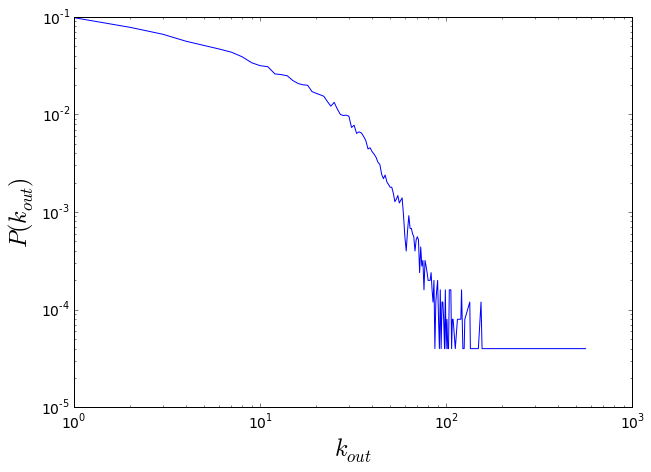

In [19]:
x=[]
y=[]
for i in sorted(degree.iteritems(), key=itemgetter(0)):
    x.append(i[0])
    y.append(float(i[1])/tot_nodes)

plt.figure(figsize=(10,7))   
plt.plot(x,y)
plt.xlabel('$k_{out}$', fontsize=24)
plt.ylabel('$P(k_{out})$', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.show()

Let's have a look at the degree-in distribution.

In [20]:
links_in=col.defaultdict(list)

fh=open('./cit-HepTh.txt','r')
#reading all the file lines
for line in fh.readlines():
    #remove "\n" characters (.strip()) and split the line at blank spaces (split.())
    s=line.strip().split()
    if s[0]!='#':
        #the first lines are comments
        origin=int(s[0])
        dest=int(s[1])
        links_in[dest].append(origin)
    
#chiudo il file
fh.close()

In [21]:
degree_in=col.defaultdict(int)
for i in links_in.keys():
    deg=len(links_in[i])
    degree_in[deg]+=1

tot_nodes_in=len(links_in)
print tot_nodes_in

23180


What is the difference from an exponential distribution?

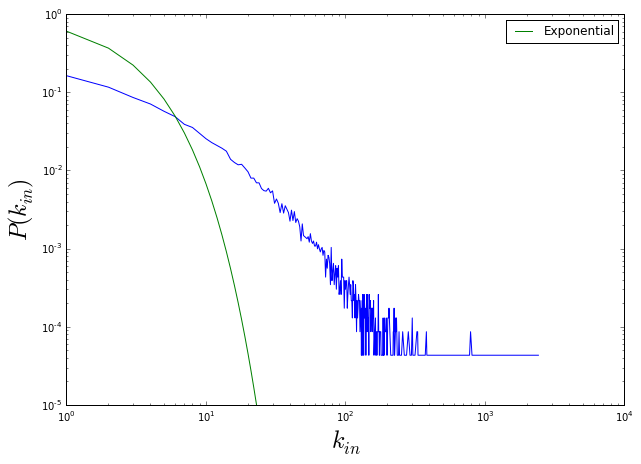

In [22]:
def f(t):
    return np.exp(-0.5*t)

x=[]
y=[]
for i in sorted(degree_in.iteritems(), key=itemgetter(0)):
    x.append(i[0])
    y.append(float(i[1])/tot_nodes_in)

plt.figure(figsize=(10,7))   
    
plt.plot(np.array(x),np.array(y))
plt.plot(np.array(x), f(np.array(x)), label='Exponential')
plt.xlabel('$k_{in}$', fontsize=24)
plt.ylabel('$P(k_{in})$', fontsize=24)
plt.yscale('log')
plt.xscale('log')
plt.axis([1,10000,0.00001,1])
plt.legend()
plt.show()